## Model

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [2]:
!nvidia-smi

'nvidia-smi' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

GPU is NOT AVAILABLE


In [4]:
# Tham số
IMG_SIZE = (224, 224)  # Điều chỉnh theo kích thước ảnh của bạn
BATCH_SIZE = 32
EPOCHS = 50
NUM_CLASSES = 15  # Thay đổi theo số lượng class thực tế

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999)

TRAIN_PATH='../dataset/train'
VAL_PATH='../dataset/val/'
TEST_PATH='../dataset/test/'
NOISE_PATH='../dataset/noise_2/'
MODEL_PATH='../model/best_model_v13.keras'

In [5]:
# Tạo data generators
train_datagen = ImageDataGenerator(
    rescale=1./224,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1./224)

# Tạo data loaders
train_generator = train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = val_test_datagen.flow_from_directory(
    VAL_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    TEST_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

noise_generator = val_test_datagen.flow_from_directory(
    NOISE_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

Found 52500 images belonging to 15 classes.
Found 11250 images belonging to 15 classes.
Found 11250 images belonging to 15 classes.
Found 5000 images belonging to 15 classes.


In [6]:
# read Model
model=tf.keras.models.load_model(MODEL_PATH)

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 24, 24, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,874,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │         7,695 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57,820,910 (220.57 MB)

 Trainable params: 19,272,975 (73.52 MB)

 Non-trainable params: 1,984 (7.75 KB)

 Optimizer params: 38,545,951 (147.04 MB)

In [8]:
# Đánh giá trên test set
test_loss, test_acc = model.evaluate(test_generator)
print(f'Tess loss: {test_loss}')
print(f'Test accuracy: {test_acc}')

D:\chientuhocai\Traffic_Sign\.venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 18/352 ━━━━━━━━━━━━━━━━━━━━ 2:11 394ms/step - accuracy: 0.9986 - loss: 0.0047

KeyboardInterrupt: 

In [40]:
# Đánh giá trên noise set
noise_loss, noise_acc = model.evaluate(noise_generator)
print(f'Noise loss: {noise_loss}')
print(f'Noise accuracy: {noise_acc}')

157/157 ━━━━━━━━━━━━━━━━━━━━ 60s 381ms/step - accuracy: 0.7931 - loss: 0.6618
Noise loss: 0.605018138885498
Noise accuracy: 0.8032000064849854


In [41]:
# train_loss, train_acc = model.evaluate(train_generator)
# print(f'Train loss: {train_loss}')
# print(f'Train accuracy: {test_acc}')

## Plot

### Confusion matrix

352/352 ━━━━━━━━━━━━━━━━━━━━ 142s 402ms/step


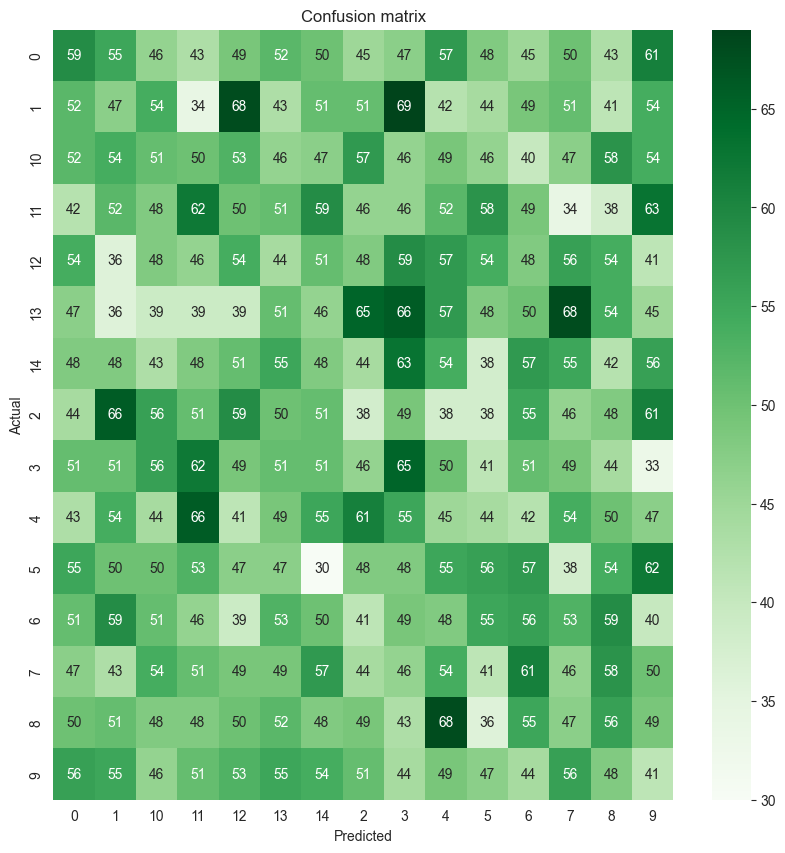

In [42]:
# Dự đoán
Y_pred = model.predict(val_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Labels
labels = test_generator.class_indices
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in y_pred]

# Thực tế
y_test = test_generator.classes
true_labels = [labels[k] for k in y_test]

# Confusion matrix
cm = confusion_matrix(true_labels, predictions)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels.values(), yticklabels=labels.values(), cmap='Greens')
plt.title('Confusion matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [43]:
print(classification_report(true_labels, predictions))

              precision    recall  f1-score   support

           0       0.08      0.08      0.08       750
           1       0.06      0.06      0.06       750
          10       0.07      0.07      0.07       750
          11       0.08      0.08      0.08       750
          12       0.07      0.07      0.07       750
          13       0.07      0.07      0.07       750
          14       0.06      0.06      0.06       750
           2       0.05      0.05      0.05       750
           3       0.08      0.09      0.08       750
           4       0.06      0.06      0.06       750
           5       0.08      0.07      0.08       750
           6       0.07      0.07      0.07       750
           7       0.06      0.06      0.06       750
           8       0.07      0.07      0.07       750
           9       0.05      0.05      0.05       750

    accuracy                           0.07     11250
   macro avg       0.07      0.07      0.07     11250
weighted avg       0.07   

352/352 ━━━━━━━━━━━━━━━━━━━━ 136s 385ms/step


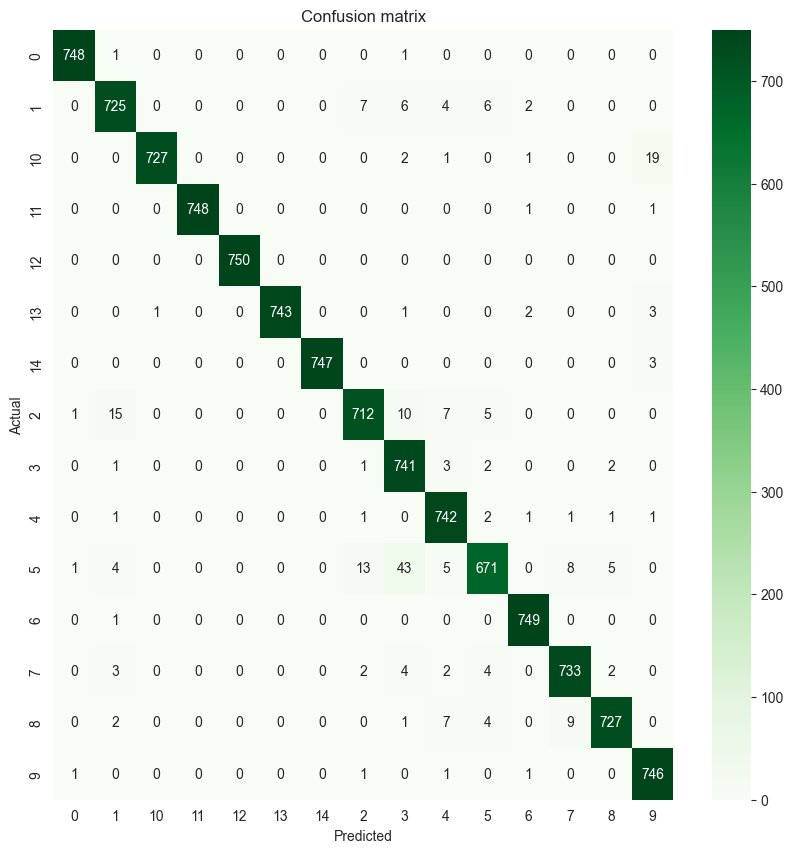

In [44]:
# Dự đoán
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Labels
labels = test_generator.class_indices
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in y_pred]

# Thực tế
y_test = test_generator.classes
true_labels = [labels[k] for k in y_test]

# Confusion matrix
cm = confusion_matrix(true_labels, predictions)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels.values(), yticklabels=labels.values(), cmap='Greens')
plt.title('Confusion matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [45]:
print(classification_report(true_labels, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       750
           1       0.96      0.97      0.96       750
          10       1.00      0.97      0.98       750
          11       1.00      1.00      1.00       750
          12       1.00      1.00      1.00       750
          13       1.00      0.99      1.00       750
          14       1.00      1.00      1.00       750
           2       0.97      0.95      0.96       750
           3       0.92      0.99      0.95       750
           4       0.96      0.99      0.98       750
           5       0.97      0.89      0.93       750
           6       0.99      1.00      0.99       750
           7       0.98      0.98      0.98       750
           8       0.99      0.97      0.98       750
           9       0.97      0.99      0.98       750

    accuracy                           0.98     11250
   macro avg       0.98      0.98      0.98     11250
weighted avg       0.98   

157/157 ━━━━━━━━━━━━━━━━━━━━ 61s 385ms/step


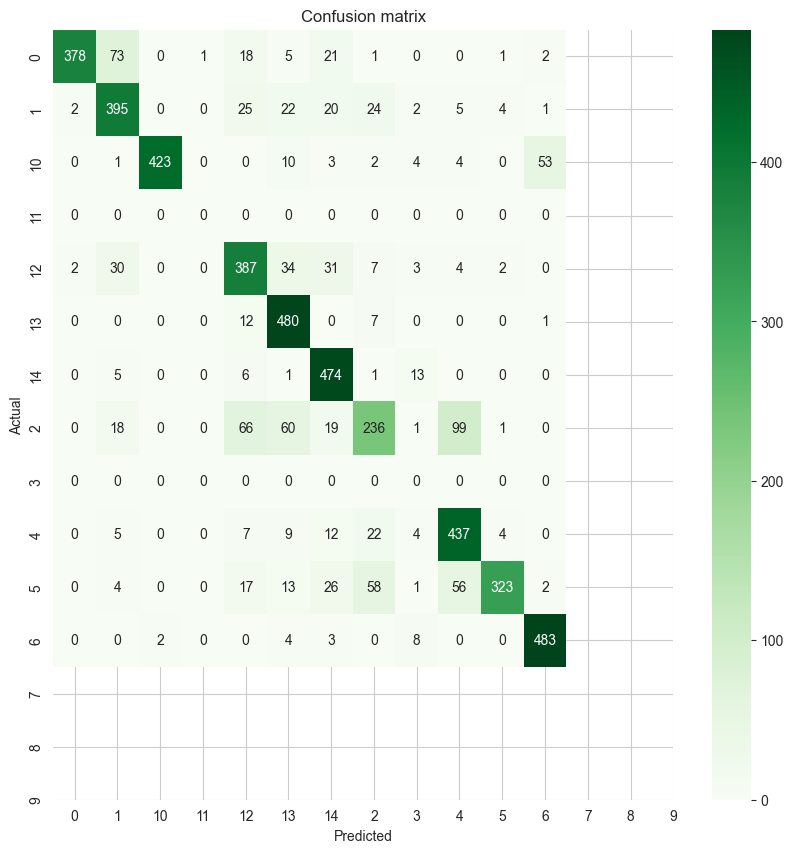

In [46]:
# Dự đoán
Y_pred = model.predict(noise_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Labels
labels = noise_generator.class_indices
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in y_pred]

# Thực tế
y_test = noise_generator.classes
true_labels = [labels[k] for k in y_test]

# Confusion matrix
cm = confusion_matrix(true_labels, predictions)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels.values(), yticklabels=labels.values(), cmap='Greens')
plt.title('Confusion matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [47]:
print(classification_report(true_labels, predictions))

              precision    recall  f1-score   support

           0       0.99      0.76      0.86       500
           1       0.74      0.79      0.77       500
          10       1.00      0.85      0.91       500
          13       0.00      0.00      0.00         0
           2       0.72      0.77      0.75       500
           3       0.75      0.96      0.84       500
           4       0.78      0.95      0.85       500
           5       0.66      0.47      0.55       500
           6       0.00      0.00      0.00         0
           7       0.72      0.87      0.79       500
           8       0.96      0.65      0.77       500
           9       0.89      0.97      0.93       500

    accuracy                           0.80      5000
   macro avg       0.68      0.67      0.67      5000
weighted avg       0.82      0.80      0.80      5000



D:\chientuhocai\Traffic_Sign\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\chientuhocai\Traffic_Sign\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\chientuhocai\Traffic_Sign\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


D:\chientuhocai\Traffic_Sign\.venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1641/1641 ━━━━━━━━━━━━━━━━━━━━ 1531s 933ms/step


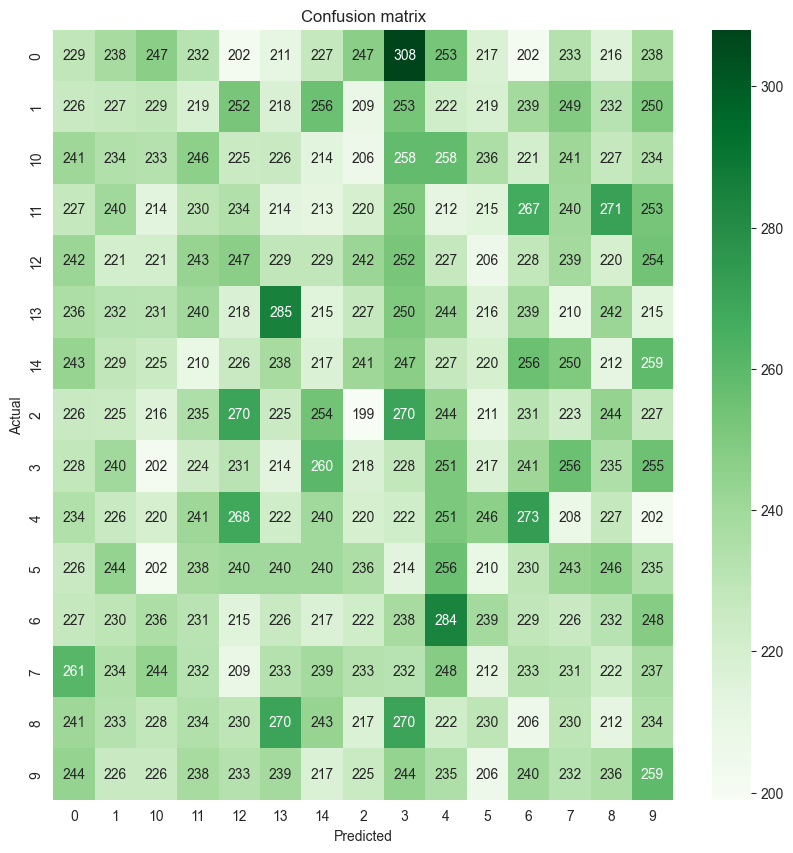

In [48]:
# Dự đoán
Y_pred = model.predict(train_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Labels
labels = train_generator.class_indices
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in y_pred]

# Thực tế
y_test = train_generator.classes
true_labels = [labels[k] for k in y_test]

# Confusion matrix
cm = confusion_matrix(true_labels, predictions)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels.values(), yticklabels=labels.values(), cmap='Greens')
plt.title('Confusion matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [49]:
# Classification report
print(classification_report(true_labels, predictions))

              precision    recall  f1-score   support

           0       0.06      0.07      0.07      3500
           1       0.07      0.06      0.07      3500
          10       0.07      0.07      0.07      3500
          11       0.07      0.07      0.07      3500
          12       0.07      0.07      0.07      3500
          13       0.08      0.08      0.08      3500
          14       0.06      0.06      0.06      3500
           2       0.06      0.06      0.06      3500
           3       0.06      0.07      0.06      3500
           4       0.07      0.07      0.07      3500
           5       0.06      0.06      0.06      3500
           6       0.06      0.07      0.07      3500
           7       0.07      0.07      0.07      3500
           8       0.06      0.06      0.06      3500
           9       0.07      0.07      0.07      3500

    accuracy                           0.07     52500
   macro avg       0.07      0.07      0.07     52500
weighted avg       0.07   

In [50]:
train_loss, train_accuracy = model.evaluate(train_generator)
val_loss, val_accuracy = model.evaluate(val_generator)
test_loss, test_accuracy = model.evaluate(test_generator)

print(f'Train loss: {train_loss}, Train accuracy: {train_accuracy}')
print(f'Validation loss: {val_loss}, Validation accuracy: {val_accuracy}')
print(f'Test loss: {test_loss}, Test accuracy: {test_accuracy}')

1641/1641 ━━━━━━━━━━━━━━━━━━━━ 1502s 915ms/step - accuracy: 0.9756 - loss: 0.0764
352/352 ━━━━━━━━━━━━━━━━━━━━ 142s 402ms/step - accuracy: 0.9779 - loss: 0.0688
352/352 ━━━━━━━━━━━━━━━━━━━━ 141s 401ms/step - accuracy: 0.9833 - loss: 0.0521
Train loss: 0.07589703798294067, Train accuracy: 0.975771427154541
Validation loss: 0.06603709608316422, Validation accuracy: 0.9791111350059509
Test loss: 0.0660172626376152, Test accuracy: 0.9785777926445007
